# WeRateDogs Twitter Data Wrangling and Analysis
## by Abdessalam Dai

## Table of Contents

<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#data-gathering">2. Data Gathering</a></li>
<li><a href="#assessing-data">3. Assessing Data</a></li>
<li><a href="#cleaning-data">4. Cleaning Data</a></li>
<li><a href="#storing-data">5. Storing Data</a></li>
<li><a href="#analyzing-visualizing">6. Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>

## 1. Introduction

The goal of this project is to put into practice the lessons I learned from the Udacity Data Analysis Nanodegree program's data wrangling section. The dataset that will be wrangled is the tweet archive of WeRateDogs, a Twitter user with the handle @dog_rates.

<a id='necessary-packages'></a>
### 1.3 Importing necessary packages

In this section we're going to import the necessary modules that we will use to perform data wrangling.

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline
sns.set_style('darkgrid')

<a id='data-gathering'></a>

## 2. Data Gathering


### 2.1 Data Archive

We will directly download the WeRateDogs Twitter archive data into `twitter-archive-enhanced.csv`.

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv', header=0)

### 2.2 Image Predictions

We will use the `requests` module to download the tweet image predictions and save it to `image_predictions.tsv`.

In [4]:
%%time

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

df_image_pred = pd.read_csv('image_predictions.tsv', sep='\t')

CPU times: user 51.3 ms, sys: 9.58 ms, total: 60.9 ms
Wall time: 333 ms


### 2.3 Additional JSON Data

We will use the `tweepy` module to query additional data via the Twitter API and save it into `tweet_json.txt`. This process will likely take 20 to 30 minutes because of Twitter's rate limit. 

Note: The next few code cells are commented because the process is already done and it took about 25 mins to complete.

In [33]:
# %%time

# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''


# auth = tweepy.OAuth1UserHandler(
#    consumer_key, consumer_secret, access_token, access_secret
# )
# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = df_archive.tweet_id.values

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}

# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     for tweet_id in tweet_ids:
#         count += 1
#         print("Tweet " + str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except Exception as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass

Tweet 1: 892420643555336193
Success
Tweet 2: 892177421306343426
Success
Tweet 3: 891815181378084864
Success
Tweet 4: 891689557279858688
Success
Tweet 5: 891327558926688256
Success
Tweet 6: 891087950875897856
Success
Tweet 7: 890971913173991426
Success
Tweet 8: 890729181411237888
Success
Tweet 9: 890609185150312448
Success
Tweet 10: 890240255349198849
Success
Tweet 11: 890006608113172480
Success
Tweet 12: 889880896479866881
Success
Tweet 13: 889665388333682689
Success
Tweet 14: 889638837579907072
Success
Tweet 15: 889531135344209921
Success
Tweet 16: 889278841981685760
Success
Tweet 17: 888917238123831296
Success
Tweet 18: 888804989199671297
Success
Tweet 19: 888554962724278272
Success
Tweet 20: 888202515573088257
Fail
Tweet 21: 888078434458587136
Success
Tweet 22: 887705289381826560
Success
Tweet 23: 887517139158093824
Success
Tweet 24: 887473957103951883
Success
Tweet 25: 887343217045368832
Success
Tweet 26: 887101392804085760
Success
Tweet 27: 886983233522544640
Success
Tweet 28: 886

Success
Tweet 221: 850019790995546112
Success
Tweet 222: 849776966551130114
Success
Tweet 223: 849668094696017920
Success
Tweet 224: 849412302885593088
Success
Tweet 225: 849336543269576704
Success
Tweet 226: 849051919805034497
Success
Tweet 227: 848690551926992896
Success
Tweet 228: 848324959059550208
Success
Tweet 229: 848213670039564288
Success
Tweet 230: 848212111729840128
Success
Tweet 231: 847978865427394560
Success
Tweet 232: 847971574464610304
Success
Tweet 233: 847962785489326080
Success
Tweet 234: 847842811428974592
Success
Tweet 235: 847617282490613760
Success
Tweet 236: 847606175596138505
Success
Tweet 237: 847251039262605312
Success
Tweet 238: 847157206088847362
Success
Tweet 239: 847116187444137987
Success
Tweet 240: 846874817362120707
Success
Tweet 241: 846514051647705089
Success
Tweet 242: 846505985330044928
Success
Tweet 243: 846153765933735936
Success
Tweet 244: 846139713627017216
Success
Tweet 245: 846042936437604353
Success
Tweet 246: 845812042753855489
Success
Twee

Success
Tweet 438: 820078625395449857
Success
Tweet 439: 820013781606658049
Success
Tweet 440: 819952236453363712
Success
Tweet 441: 819924195358416896
Success
Tweet 442: 819711362133872643
Success
Tweet 443: 819588359383371776
Success
Tweet 444: 819347104292290561
Success
Tweet 445: 819238181065359361
Success
Tweet 446: 819227688460238848
Success
Tweet 447: 819015337530290176
Success
Tweet 448: 819015331746349057
Success
Tweet 449: 819006400881917954
Success
Tweet 450: 819004803107983360
Success
Tweet 451: 818646164899774465
Success
Tweet 452: 818627210458333184
Success
Tweet 453: 818614493328580609
Success
Tweet 454: 818588835076603904
Success
Tweet 455: 818536468981415936
Success
Tweet 456: 818307523543449600
Success
Tweet 457: 818259473185828864
Success
Tweet 458: 818145370475810820
Success
Tweet 459: 817908911860748288
Success
Tweet 460: 817827839487737858
Success
Tweet 461: 817777686764523521
Success
Tweet 462: 817536400337801217
Success
Tweet 463: 817502432452313088
Success
Twee

Success
Tweet 654: 792050063153438720
Success
Tweet 655: 791821351946420224
Success
Tweet 656: 791784077045166082
Success
Tweet 657: 791780927877898241
Success
Tweet 658: 791774931465953280
Success
Tweet 659: 791672322847637504
Success
Tweet 660: 791406955684368384
Success
Tweet 661: 791312159183634433
Success
Tweet 662: 791026214425268224
Success
Tweet 663: 790987426131050500
Success
Tweet 664: 790946055508652032
Success
Tweet 665: 790723298204217344
Success
Tweet 666: 790698755171364864
Success
Tweet 667: 790581949425475584
Success
Tweet 668: 790337589677002753
Success
Tweet 669: 790277117346975746
Success
Tweet 670: 790227638568808452
Success
Tweet 671: 789986466051088384
Success
Tweet 672: 789960241177853952
Success
Tweet 673: 789903600034189313
Success
Tweet 674: 789628658055020548
Success
Tweet 675: 789599242079838210
Success
Tweet 676: 789530877013393408
Success
Tweet 677: 789314372632018944
Success
Tweet 678: 789280767834746880
Success
Tweet 679: 789268448748703744
Success
Twee

Rate limit reached. Sleeping for: 160


Success
Tweet 755: 778764940568104960
Success
Tweet 756: 778748913645780993
Success
Tweet 757: 778650543019483137
Success
Tweet 758: 778624900596654080
Success
Tweet 759: 778408200802557953
Success
Tweet 760: 778396591732486144
Success
Tweet 761: 778383385161035776
Success
Tweet 762: 778286810187399168
Success
Tweet 763: 778039087836069888
Success
Tweet 764: 778027034220126208
Success
Tweet 765: 777953400541634568
Success
Tweet 766: 777885040357281792
Success
Tweet 767: 777684233540206592
Success
Tweet 768: 777641927919427584
Success
Tweet 769: 777621514455814149
Success
Tweet 770: 777189768882946048
Success
Tweet 771: 776819012571455488
Success
Tweet 772: 776813020089548800
Success
Tweet 773: 776477788987613185
Success
Tweet 774: 776249906839351296
Success
Tweet 775: 776218204058357768
Success
Tweet 776: 776201521193218049
Success
Tweet 777: 776113305656188928
Success
Tweet 778: 776088319444877312
Success
Tweet 779: 775898661951791106
Success
Tweet 780: 775842724423557120
Success
Twee

Success
Tweet 972: 750101899009982464
Success
Tweet 973: 750086836815486976
Success
Tweet 974: 750071704093859840
Success
Tweet 975: 750056684286914561
Success
Tweet 976: 750041628174217216
Success
Tweet 977: 750026558547456000
Success
Tweet 978: 750011400160841729
Success
Tweet 979: 749996283729883136
Success
Tweet 980: 749981277374128128
Success
Tweet 981: 749774190421639168
Success
Tweet 982: 749417653287129088
Success
Tweet 983: 749403093750648834
Success
Tweet 984: 749395845976588288
Success
Tweet 985: 749317047558017024
Success
Tweet 986: 749075273010798592
Success
Tweet 987: 749064354620928000
Success
Tweet 988: 749036806121881602
Success
Tweet 989: 748977405889503236
Success
Tweet 990: 748932637671223296
Success
Tweet 991: 748705597323898880
Success
Tweet 992: 748699167502000129
Success
Tweet 993: 748692773788876800
Success
Tweet 994: 748575535303884801
Success
Tweet 995: 748568946752774144
Success
Tweet 996: 748346686624440324
Success
Tweet 997: 748337862848962560
Success
Twee

Success
Tweet 1183: 718971898235854848
Success
Tweet 1184: 718939241951195136
Success
Tweet 1185: 718631497683582976
Success
Tweet 1186: 718613305783398402
Success
Tweet 1187: 718540630683709445
Success
Tweet 1188: 718460005985447936
Success
Tweet 1189: 718454725339934721
Success
Tweet 1190: 718246886998687744
Success
Tweet 1191: 718234618122661888
Success
Tweet 1192: 717841801130979328
Success
Tweet 1193: 717790033953034240
Success
Tweet 1194: 717537687239008257
Success
Tweet 1195: 717428917016076293
Success
Tweet 1196: 717421804990701568
Success
Tweet 1197: 717047459982213120
Success
Tweet 1198: 717009362452090881
Success
Tweet 1199: 716802964044845056
Success
Tweet 1200: 716791146589110272
Success
Tweet 1201: 716730379797970944
Success
Tweet 1202: 716447146686459905
Success
Tweet 1203: 716439118184652801
Success
Tweet 1204: 716285507865542656
Success
Tweet 1205: 716080869887381504
Success
Tweet 1206: 715928423106027520
Success
Tweet 1207: 715758151270801409
Success
Tweet 1208: 71573

Success
Tweet 1394: 700029284593901568
Success
Tweet 1395: 700002074055016451
Success
Tweet 1396: 699801817392291840
Success
Tweet 1397: 699788877217865730
Success
Tweet 1398: 699779630832685056
Success
Tweet 1399: 699775878809702401
Success
Tweet 1400: 699691744225525762
Success
Tweet 1401: 699446877801091073
Success
Tweet 1402: 699434518667751424
Success
Tweet 1403: 699423671849451520
Success
Tweet 1404: 699413908797464576
Success
Tweet 1405: 699370870310113280
Success
Tweet 1406: 699323444782047232
Success
Tweet 1407: 699088579889332224
Success
Tweet 1408: 699079609774645248
Success
Tweet 1409: 699072405256409088
Success
Tweet 1410: 699060279947165696
Success
Tweet 1411: 699036661657767936
Success
Tweet 1412: 698989035503689728
Success
Tweet 1413: 698953797952008193
Success
Tweet 1414: 698907974262222848
Success
Tweet 1415: 698710712454139905
Success
Tweet 1416: 698703483621523456
Success
Tweet 1417: 698635131305795584
Success
Tweet 1418: 698549713696649216
Success
Tweet 1419: 69835

Success
Tweet 1605: 685906723014619143
Success
Tweet 1606: 685681090388975616
Success
Tweet 1607: 685667379192414208
Success
Tweet 1608: 685663452032069632
Success
Tweet 1609: 685641971164143616
Success
Tweet 1610: 685547936038666240
Success
Tweet 1611: 685532292383666176
Success
Tweet 1612: 685325112850124800
Success
Tweet 1613: 685321586178670592
Success
Tweet 1614: 685315239903100929
Success
Tweet 1615: 685307451701334016
Success
Tweet 1616: 685268753634967552
Success
Tweet 1617: 685198997565345792
Success
Tweet 1618: 685169283572338688
Success
Tweet 1619: 684969860808454144
Success
Tweet 1620: 684959798585110529
Success
Tweet 1621: 684940049151070208
Success
Tweet 1622: 684926975086034944
Success
Tweet 1623: 684914660081053696
Success
Tweet 1624: 684902183876321280
Success
Tweet 1625: 684880619965411328
Success
Tweet 1626: 684830982659280897
Success
Tweet 1627: 684800227459624960
Success
Tweet 1628: 684594889858887680
Success
Tweet 1629: 684588130326986752
Success
Tweet 1630: 68456

Rate limit reached. Sleeping for: 611


Success
Tweet 1655: 683449695444799489
Success
Tweet 1656: 683391852557561860
Success
Tweet 1657: 683357973142474752
Success
Tweet 1658: 683142553609318400
Success
Tweet 1659: 683111407806746624
Success
Tweet 1660: 683098815881154561
Success
Tweet 1661: 683078886620553216
Success
Tweet 1662: 683030066213818368
Success
Tweet 1663: 682962037429899265
Success
Tweet 1664: 682808988178739200
Success
Tweet 1665: 682788441537560576
Success
Tweet 1666: 682750546109968385
Success
Tweet 1667: 682697186228989953
Success
Tweet 1668: 682662431982772225
Success
Tweet 1669: 682638830361513985
Success
Tweet 1670: 682429480204398592
Success
Tweet 1671: 682406705142087680
Success
Tweet 1672: 682393905736888321
Success
Tweet 1673: 682389078323662849
Success
Tweet 1674: 682303737705140231
Success
Tweet 1675: 682259524040966145
Success
Tweet 1676: 682242692827447297
Success
Tweet 1677: 682088079302213632
Success
Tweet 1678: 682059653698686977
Success
Tweet 1679: 682047327939461121
Success
Tweet 1680: 68203

Success
Tweet 1866: 675354435921575936
Success
Tweet 1867: 675349384339542016
Success
Tweet 1868: 675334060156301312
Success
Tweet 1869: 675166823650848770
Success
Tweet 1870: 675153376133427200
Success
Tweet 1871: 675149409102012420
Success
Tweet 1872: 675147105808306176
Success
Tweet 1873: 675146535592706048
Success
Tweet 1874: 675145476954566656
Success
Tweet 1875: 675135153782571009
Success
Tweet 1876: 675113801096802304
Success
Tweet 1877: 675111688094527488
Success
Tweet 1878: 675109292475830276
Success
Tweet 1879: 675047298674663426
Success
Tweet 1880: 675015141583413248
Success
Tweet 1881: 675006312288268288
Success
Tweet 1882: 675003128568291329
Success
Tweet 1883: 674999807681908736
Success
Tweet 1884: 674805413498527744
Success
Tweet 1885: 674800520222154752
Success
Tweet 1886: 674793399141146624
Success
Tweet 1887: 674790488185167872
Success
Tweet 1888: 674788554665512960
Success
Tweet 1889: 674781762103414784
Success
Tweet 1890: 674774481756377088
Success
Tweet 1891: 67476

Success
Tweet 2077: 670838202509447168
Success
Tweet 2078: 670833812859932673
Success
Tweet 2079: 670832455012716544
Success
Tweet 2080: 670826280409919488
Success
Tweet 2081: 670823764196741120
Success
Tweet 2082: 670822709593571328
Success
Tweet 2083: 670815497391357952
Success
Tweet 2084: 670811965569282048
Success
Tweet 2085: 670807719151067136
Success
Tweet 2086: 670804601705242624
Success
Tweet 2087: 670803562457407488
Success
Tweet 2088: 670797304698376195
Success
Tweet 2089: 670792680469889025
Success
Tweet 2090: 670789397210615808
Success
Tweet 2091: 670786190031921152
Success
Tweet 2092: 670783437142401025
Success
Tweet 2093: 670782429121134593
Success
Tweet 2094: 670780561024270336
Success
Tweet 2095: 670778058496974848
Success
Tweet 2096: 670764103623966721
Success
Tweet 2097: 670755717859713024
Success
Tweet 2098: 670733412878163972
Success
Tweet 2099: 670727704916926465
Success
Tweet 2100: 670717338665226240
Success
Tweet 2101: 670704688707301377
Success
Tweet 2102: 67069

Success
Tweet 2288: 667177989038297088
Success
Tweet 2289: 667176164155375616
Success
Tweet 2290: 667174963120574464
Success
Tweet 2291: 667171260800061440
Success
Tweet 2292: 667165590075940865
Success
Tweet 2293: 667160273090932737
Success
Tweet 2294: 667152164079423490
Success
Tweet 2295: 667138269671505920
Success
Tweet 2296: 667119796878725120
Success
Tweet 2297: 667090893657276420
Success
Tweet 2298: 667073648344346624
Success
Tweet 2299: 667070482143944705
Success
Tweet 2300: 667065535570550784
Success
Tweet 2301: 667062181243039745
Success
Tweet 2302: 667044094246576128
Success
Tweet 2303: 667012601033924608
Success
Tweet 2304: 666996132027977728
Success
Tweet 2305: 666983947667116034
Success
Tweet 2306: 666837028449972224
Success
Tweet 2307: 666835007768551424
Success
Tweet 2308: 666826780179869698
Success
Tweet 2309: 666817836334096384
Success
Tweet 2310: 666804364988780544
Success
Tweet 2311: 666786068205871104
Success
Tweet 2312: 666781792255496192
Success
Tweet 2313: 66677

In [66]:
# print("Number of tweets", count)
# print("Number of tweets not found", len(fails_dict))

Number of tweets 2356
Number of tweets not found 31


Let's create a dataframe `df_additional_data` that will contain the following information: tweet id, retweet count and favorite count. Then save it to `additional_data.csv`.

In [36]:
# additional_data = []
# with open('tweet_json.txt') as file:
#     for line in file:
#         data = json.loads(line)
#         id_str = data.get('id_str')
#         retweet_count = data.get('retweet_count')
#         favorite_count = data.get('favorite_count')
#         additional_data.append(
#             {'id_str': id_str,
#             'retweet_count': retweet_count,
#             'favorite_count': favorite_count}
#         )

# df_additional_data = pd.DataFrame(additional_data, columns = ['id_str', 'retweet_count', 'favorite_count'])
# df_additional_data.to_csv('additional_data.csv', index=False)

Now let's read the additional data csv file.

In [5]:
df_additional_data = pd.read_csv('additional_data.csv', header=0)

<a id='assessing-data'></a>

## 3. Assessing Data

### 3.1 Visual Assessment

#### 3.1.1 Data Archive

Let's check the values of the `source` column.

In [6]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> <b>Tidiness Issues</b>
> - Unnecessary `source` column. We won't need this for our analysis. And most of tweets' source are from iPhone.

Let's examine a sample of 30 records from the <b>df_archive</b> dataframe.

In [13]:
df_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1548,689275259254616065,NaN,NaN,2016-01-19 02:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucky. He was showing his friends an extr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689275259...,10,10,Lucky,None,None,None,None
1950,673688752737402881,NaN,NaN,2015-12-07 02:21:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He doesn't know how to shoe. 9/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673688752...,9,10,Larry,None,None,None,None
857,763956972077010945,7.638652e+17,1.584641e+07,2016-08-12 04:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@TheEllenShow I'm not sure if you know this bu...,NaN,NaN,NaN,NaN,12,10,None,doggo,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,None,None,None,None
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,None,None,pupper,None
1441,696877980375769088,NaN,NaN,2016-02-09 02:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She's in a predicament. Not sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696877980...,9,10,Misty,None,None,pupper,None
1862,675432746517426176,NaN,NaN,2015-12-11 21:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday. Here's some golden puppers. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675432746...,12,10,None,None,None,None,None
1104,735137028879360001,NaN,NaN,2016-05-24 15:55:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Buckley. His family &amp; some neighbors ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735137028...,9,10,Buckley,None,None,pupper,None
1885,674793399141146624,6.717299e+17,4.196984e+09,2015-12-10 03:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674793399...,13,10,None,None,None,None,None
800,772615324260794368,NaN,NaN,2016-09-05 02:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gromit. He's pupset bec...,7.652221e+17,4.196984e+09,2016-08-15 16:22:20 +0000,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None


> <b>Quality Issues</b>
> - Not all tweets are original tweets, some of them are retweets or replies. We can know that a record represents a retweet when the columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` are not NULL. And a record represents a reply when the columns `in_reply_to_status_id` and `in_reply_to_user_id` are not null.

> <b>Tidiness Issues</b>
> - The dog stage is one variable. But this variable is spread across 4 columns: `doggo`, `floofer`, `pupper`, `puppo`.
> - No need for the following columns : `retweeted_status_id`, `retweeted_status_user_id`,  `retweeted_status_timestamp`, `in_reply_to_status_id` and `in_reply_to_user_id`.

#### 3.1.2 Image Predictions

Let's examine a sample of 30 records from the <b>df_image_pred</b> dataframe.

In [14]:
df_image_pred.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,Labrador_retriever,0.719510,True,Chesapeake_Bay_retriever,0.122019,True,Newfoundland,0.038828,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
922,702217446468493312,https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg,1,golden_retriever,0.242419,True,chow,0.226800,True,cocker_spaniel,0.194086,True
2000,876120275196170240,https://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg,1,Bernese_mountain_dog,0.534327,True,Saint_Bernard,0.346312,True,Greater_Swiss_Mountain_dog,0.094933,True
398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True
1493,783085703974514689,https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg,1,Chesapeake_Bay_retriever,0.240602,True,Airedale,0.164088,True,boxer,0.134506,True
594,679503373272485890,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,0.999846,False,meerkat,0.000072,False,echidna,0.000044,False
1786,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,Labrador_retriever,0.315163,True,golden_retriever,0.153210,True,Pekinese,0.132791,True
1983,871879754684805121,https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg,1,Shetland_sheepdog,0.969171,True,collie,0.018261,True,Pomeranian,0.008515,True
1657,810896069567610880,https://pbs.twimg.com/media/C0DhpcrUAAAnx88.jpg,1,flat-coated_retriever,0.820804,True,Labrador_retriever,0.082318,True,curly-coated_retriever,0.067461,True


> <b>Quality Issues</b>
> - The types of dogs in columns `p1`, `p2`, and `p3` don't have the same format, some of them are lowercase, others are titlecase.

> <b>Tidiness Issues</b>
> - Instead of keeping the three types that are in `p1`, `p2`, and `p3`, we only need the one with the heighest probability.
> - No need for records in which the image is predicted as non dog (ie. `p1_dog`, `p2_dog` and `p3_dog` are all False)

#### 3.1.3 Additional JSON Data

Let's examine a sample of 30 records from the <b>df_additional_data</b> dataframe.

In [15]:
df_additional_data.sample(30)

,id_str,retweet_count,favorite_count
663,788150585577050112,1184,5678
172,857062103051644929,143,0
1160,718234618122661888,898,3476
545,802239329049477120,2410,8442
1962,672609152938721280,334,943
1902,674019345211760640,259,990
2052,670811965569282048,226,960
272,838476387338051585,4290,20496
703,782722598790725632,4934,15910
360,827653905312006145,2746,14166


### 3.2. Programmatic Assessment

#### 3.2.1 Data Archive

In [16]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> <b>Tidiness Issues</b>
> - Even though some ratings are greater than 10, we know that the rating is on a scale of 10 for all records. So there's no need for the rating_denominator column.

It looks like there are no duplicate records in the Data Archive dataset.

In [17]:
df_archive[df_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> <b>Quality Issues</b>
> - The datatype of `tweet_id` is int64 but it should be an object.
> - The datatype of `timestamp` is object but it should be datetime.
> - Some records have missing values in the `expanded_urls` column.

In [19]:
set(df_archive.name.values.tolist())

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


> <b>Quality Issues</b>
> - Non common dog names in the `name` column, such as 'a', 'o', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'.

#### 3.2.2 Image Predictions

In [20]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> <b>Quality Issues</b>
> - The datatype of `tweet_id` is int64 but it should be an object.

It looks like there are no duplicate records in the Image Predictions dataset.

In [22]:
df_image_pred[df_image_pred.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 3.2.3 Tweet Json Data

In [23]:
df_additional_data.describe()

,id_str,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,2428.191828,6879.501075
std,6.814903e+16,4110.316685,10684.920606
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,489.000000,1197.000000
50%,7.177900e+17,1129.000000,2985.000000
75%,7.986285e+17,2810.000000,8411.000000
max,8.924206e+17,69480.000000,141884.000000


In [24]:
df_additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id_str          2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


> <b>Quality Issues</b>
> - The datatype of `id_str` is int64 but it should be an object.


> <b>Tidiness Issues</b>
> - The column name of `id_str` should be changed to `tweet_id` so that we can merege the three datasets later.

### 3.3 Quality issues

#### Data Archive:

1. 181 records represent retweets and 78 records represent replies. These records are unnecessary.
2. Non common dog names in the `name` column, such as 'a', 'o', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'.
3. The datatype of `tweet_id` is int64 but it should be an object.
4. The datatype of `timestamp` is object but it should be datetime.
5. Some records have missing values in the `expanded_urls` column.

####  Image Predictions

1. The types of dogs in columns p1, p2, and p3 don't have the same format, some of them are lowercase, others are titlecase.

2. The datatype of tweet_id is int64 but it should be an object.

3. There are 2075 records, meaning that we have 281 missing records, because there are 2356 records in the Data Archive dataset.

#### Tweet Json Data

1. The datatype of `id_str` is int64 but it should be an object.
2. There are 2325 records present. meaning that we have 31 missing records.


### 3.4 Tidiness issues


#### Data Archive:

1. The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo.

2. No need for the following columns : `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `rating_denominator`, and `source`.


#### Image Predictions

1. Instead of keeping the three types that are in p1, p2, and p3, we only need the one with the heighest probability.

2. No need for records in which the image is predicted as a non dog (ie. `p1_dog`, `p2_dog` and `p3_dog` are all False).

3. No need for the `img_num` column.

#### Tweet JSON Data

1. The column name of `id_str` should be changed to `tweet_id` so that we can merege the three datasets.


- Information about one tweet is spread across three different files/dataframes. It should instead be sotred in one dataset.


<a id='cleaning-data'></a>

## 4. Cleaning Data

In this section, we will clean all of the issues that we have discovered during the assessing proccess. 

First let's make copies of original datasets.

In [123]:
df_archive_clean = df_archive.copy()

In [124]:
df_image_pred_clean = df_image_pred.copy()

In [125]:
df_additional_data_clean = df_additional_data.copy()

### 4.1 Quality Issues

#### 4.1.1 Data Archive

##### Issue #1:
181 records represent retweets and 78 records represent replies. These records are unnecessary.

##### Define:

In order to fix this, we need to drop rows where the columns `retweeted_status_id` or `in_reply_to_status_id` are not null (ie. records that are either retweets or replies)

##### Code

In [126]:
df_archive_clean = df_archive_clean[
    df_archive_clean.retweeted_status_id.isnull() & df_archive_clean.in_reply_to_status_id.isnull()
]

##### Test

In [127]:
assert df_archive_clean.retweeted_status_id.isnull().all()
assert df_archive_clean.in_reply_to_status_id.isnull().all()

print(f"Number of records: {df_archive_clean.shape[0]}")

Number of records: 2097


##### Issue #2:

Non common dog names in the name column, such as 'a', 'o', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'.

##### Define:

- Non dog names are in lowercase as a result of the way the names were extracted from the tweet text, whereas a proper dog name is capitalized. We can remove non-dog names by removed lowercase names.
- For dogs of which the name is None, we will simply replace it with 'Unknown'. Because there are many dogs with unknown names and removing them will leave us a small dataset.

##### Code

In [145]:
mask = df_archive_clean.name.str.islower()
df_archive_clean.loc[mask, 'name'] = np.nan

df_archive_clean.name.replace('None', 'Unknown', inplace=True)
df_archive_clean.name = df_archive_clean.name.fillna("Unknown")

##### Test

In [149]:
assert df_archive_clean.name.isna().sum() == 0
df_archive_clean.name.value_counts()

Unknown       707
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

##### Issue #3:

The datatype of tweet_id is int64 but it should be an object.

##### Define:

We will convert the datatype of `tweet_id` to string/object type.

##### Code

In [150]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].apply(str)

##### Test

In [151]:
df_archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

##### Issue #4:

The datatype of timestamp is object but it should be datetime.

##### Define:

We will convert the datatype of `timestamp` to datetime.

##### Code

In [152]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

##### Test

In [153]:
df_archive_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

##### Issue #4:

Some records have missing values in the `expanded_urls` column.

##### Define:

Drop rows that have missing values in the `expanded_urls` column.

##### Code

In [154]:
df_archive_clean = df_archive_clean[df_archive_clean.expanded_urls.notna()]

##### Test

In [155]:
assert df_archive_clean.expanded_urls.isna().sum() == 0

#### 4.1.2 Image Predictions

##### Issue #1:
The types of dogs in columns p1, p2, and p3 don't have the same format, some of them are lowercase, others are titlecase.

##### Define:

We will convert all the values of `p1`, `p2` and `p3` to lowercase. And replace all spaces with an underscore.

##### Code

In [156]:
for p in ['p1', 'p2', 'p3']:
    df_image_pred_clean[p] = df_image_pred_clean[p].str.lower().apply(lambda x: x.replace(' ', '_'))

##### Test

In [157]:
df_image_pred_clean.loc[:, ['p1', 'p2', 'p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
...,...,...,...
2070,basset,english_springer,german_short-haired_pointer
2071,paper_towel,labrador_retriever,spatula
2072,chihuahua,malamute,kelpie
2073,chihuahua,pekinese,papillon


##### Issue #2:
The datatype of `tweet_id` is int64 but it should be an object.

##### Define:

We will convert the datatype of `tweet_id` to string/object type.

##### Code

In [158]:
df_image_pred_clean['tweet_id'] = df_image_pred_clean['tweet_id'].apply(str)

##### Test

In [159]:
df_image_pred_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### 4.1.3 Tweet JSON Data

##### Issue #1:

The datatype of id_str is int64 but it should be an object.

##### Define:

We will convert the datatype of `id_str` to string/object type.

##### Code

In [160]:
df_additional_data_clean['id_str'] = df_additional_data_clean['id_str'].apply(str)

##### Test

In [161]:
df_additional_data_clean.dtypes

id_str            object
retweet_count      int64
favorite_count     int64
dtype: object

### 4.2 Tidiness Issues

#### 4.2.1 Data Archive

##### Issue #1:

The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns: doggo, floofer, pupper, puppo.

##### Define:

- First replace None in stage columns with an empty string.
- Then combine the stages in one column `stage`.
- Then format entries with multiple dog stages which appeared like doggopupper.
- Finally, drop the columns doggo, pupper, puppo and floofer.

##### Code

In [163]:
# First replace None in stage columns with empty string as follows.
df_archive_clean.doggo.replace('None', '', inplace=True)
df_archive_clean.pupper.replace('None', '', inplace=True)
df_archive_clean.puppo.replace('None', '', inplace=True)
df_archive_clean.floofer.replace('None', '', inplace=True)

df_archive_clean['stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo

df_archive_clean.loc[df_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_archive_clean.loc[df_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_archive_clean.loc[df_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'


df_archive_clean.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], inplace=True)

##### Test

In [164]:
df_archive_clean.stage.value_counts()

                 1759
pupper            220
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

##### Issue #2:

No need for the following columns : `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `rating_denominator`, and `source`.

##### Define:

We will define a list that contains these unnecessary columns and drop them.

##### Code

In [166]:
unnecessary_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
                       'in_reply_to_status_id', 'in_reply_to_user_id', 'rating_denominator', 'source']
df_archive_clean.drop(columns=unnecessary_columns, inplace=True)

##### Test

In [167]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'name', 'stage'],
      dtype='object')

#### 4.2.2 Image Predictions

##### Issue #1:

Instead of keeping the three types that are in p1, p2, and p3, we only need the one with the heighest probability.

##### Define:

- Loop through the records:
    - Set the the column `p_conf`, `p` and `p_dog` to the values of the dog breed with highest probability.
 
- Then drop all the old columns (`p1_conf`, `p1`, `p1_dog`, etc.)

##### Code

In [168]:
for index, row in df_image_pred_clean.iterrows():
    p1, p2, p3 = row['p1'], row['p2'], row['p3']
    p1_conf, p2_conf, p3_conf = row['p1_conf'], row['p2_conf'], row['p3_conf']
    p1_dog, p2_dog, p3_dog = row['p1_dog'], row['p2_dog'], row['p3_dog']
    if p1_conf > max(p2_conf, p3_conf):
        df_image_pred_clean.at[index, ['p_conf', 'p', 'p_dog']] = [p1_conf, p1, p1_dog]
    elif p2_conf > max(p1_conf, p3_conf):
        df_image_pred_clean.at[index, ['p_conf', 'p', 'p_dog']] = [p2_conf, p2, p2_dog]
    elif p3_conf > max(p2_conf, p1_conf):
        df_image_pred_clean.at[index, ['p_conf', 'p', 'p_dog']] = [p3_conf, p3, p3_dog]

df_image_pred_clean.drop(columns=['p1', 'p2', 'p3', 
                                  'p1_conf', 'p2_conf', 'p3_conf', 
                                  'p1_dog', 'p2_dog', 'p3_dog'], inplace=True)

##### Test

In [169]:
df_image_pred_clean

,tweet_id,jpg_url,img_num,p_conf,p,p_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,welsh_springer_spaniel,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,redbone,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,german_shepherd,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,rhodesian_ridgeback,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,miniature_pinscher,True
...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0.555712,basset,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0.170278,paper_towel,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0.716012,chihuahua,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0.323581,chihuahua,True


##### Issue #2:

No need for records in which the image is predicted as a non dog (ie. p_dog is False).

##### Define:

- Drop rows where `p_dog` is set to False.
- Then drop the `p_dog` and `p_conf` columns since we are sure that all records represent dogs.

##### Code

In [170]:
df_image_pred_clean = df_image_pred_clean.query("p_dog == True")
df_image_pred_clean.drop(columns=['p_dog', 'p_conf'], inplace=True)

/tmp/ipykernel_31092/3841436775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_image_pred_clean.drop(columns=['p_dog', 'p_conf'], inplace=True)


##### Test

In [171]:
df_image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p'], dtype='object')

##### Issue #3:

No need for the `img_num` column.


##### Define:

We will drop the `img_num` column.

##### Code

In [172]:
df_image_pred_clean.drop(columns=['img_num'], inplace=True)

/tmp/ipykernel_31092/3667133513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_image_pred_clean.drop(columns=['img_num'], inplace=True)


##### Test

In [173]:
df_image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'p'], dtype='object')

#### 4.2.3 Tweet JSON Data

##### Issue #1:

The column name of `id_str` should be changed to `tweet_id` so that we can merege the three datasets.

##### Define:

Change the name of the column `id_str` to `tweet_id`.

##### Code

In [174]:
df_additional_data_clean.rename(columns={'id_str':'tweet_id'}, inplace=True)

##### Test

In [175]:
df_additional_data_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

##### Last Issue:

Information about one tweet is spread across three different files/dataframes. It should instead be sotred in one dataset.

##### Define:

Let's merge the 3 gathered, assessed and cleaned datasets. And save them to a master dataset into `twitter_archive_master.csv`.

##### Code

In [176]:
df_master = pd.merge(df_archive_clean, df_image_pred_clean, on='tweet_id', how='inner')
df_master = pd.merge(df_master, df_additional_data_clean, on='tweet_id', how='inner')

##### Test

In [177]:
df_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,stage,jpg_url,p,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,5185,28471
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,3424,21387
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,7616,34337
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,Unknown,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,2551,17276
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,1621,10082


<a id='storing-data'></a>


## 5. Storing Data



In [178]:
df_master.to_csv('twitter_archive_master.csv', index=False)
df_master = pd.read_csv('twitter_archive_master.csv', header=0)

<a id='analyzing-visualizing'></a>

## 6. Analyzing and Visualizing Data


### 6.1 Top 10 highest rated dog breeds on average

We can see that the highest rated dog breed is clumber.

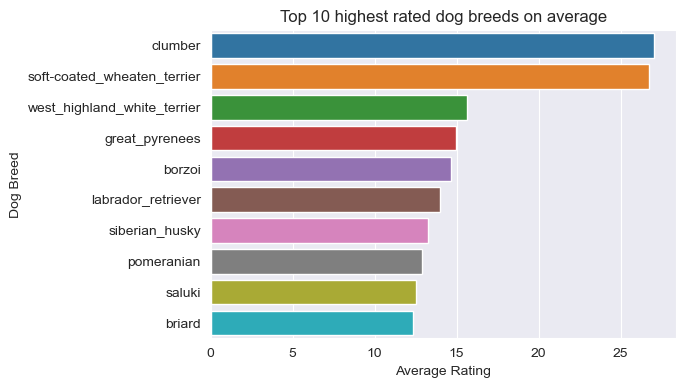

In [181]:
df_top10 = df_master.groupby('p').mean().sort_values('rating_numerator', ascending=False).head(10)

fig = plt.figure(figsize = (6, 4))
ax = sns.barplot(df_top10, x='rating_numerator', y=df_top10.index);
ax.set(xlabel='Average Rating', ylabel='Dog Breed', title='Top 10 highest rated dog breeds on average');

### 6.2 Top 10 most favored dog breeds

However the most favored dog breed is Saluki.

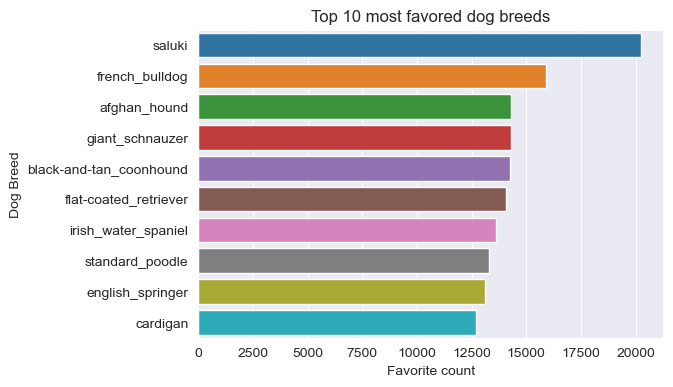

In [183]:
df_top10 = df_master.groupby('p').mean().sort_values('favorite_count', ascending=False).head(10)

fig = plt.figure(figsize = (6, 4))
ax = sns.barplot(df_top10, x='favorite_count', y=df_top10.index);
ax.set(xlabel='Favorite count', ylabel='Dog Breed', title='Top 10 most favored dog breeds');

### 6.3 Top 10 Most  common dog names

Cooper, Charlie and Oliver are the three most common in the dataset. And most other dog's names are unknown.

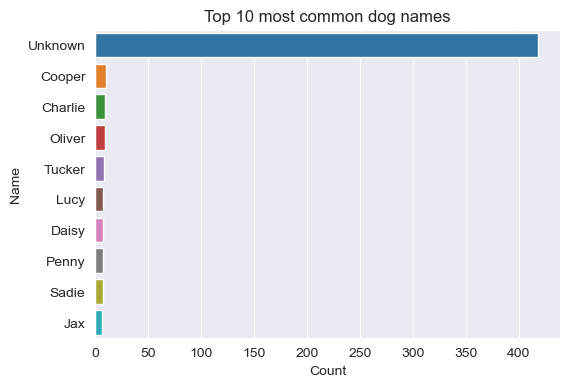

In [184]:
df_top10 = df_master.groupby('name').count().sort_values('tweet_id', ascending=False).head(10)

fig = plt.figure(figsize = (6, 4))
ax = sns.barplot(df_top10, x='tweet_id', y=df_top10.index);
ax.set(xlabel='Count', ylabel='Name', title='Top 10 most common dog names');

### 6.4 Top 10 Most  common dog breeds

Golden retriever is  the most common name with over 100 dogs present in the dataset.

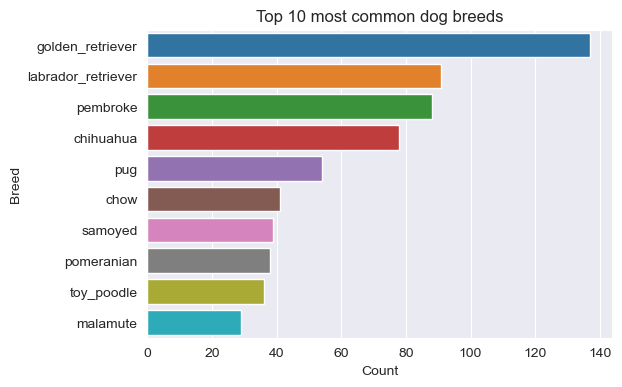

In [185]:
df_top10 = df_master.groupby('p').count().sort_values('tweet_id', ascending=False).head(10)

fig = plt.figure(figsize = (6, 4))
ax = sns.barplot(df_top10, x='tweet_id', y=df_top10.index);
ax.set(xlabel='Count', ylabel='Breed', title='Top 10 most common dog breeds');

### 6.5 Relationship between retweets count and  favorites count

There's a high positive and strong correlation between retweets count and favorites count.

<Figure size 300x300 with 0 Axes>

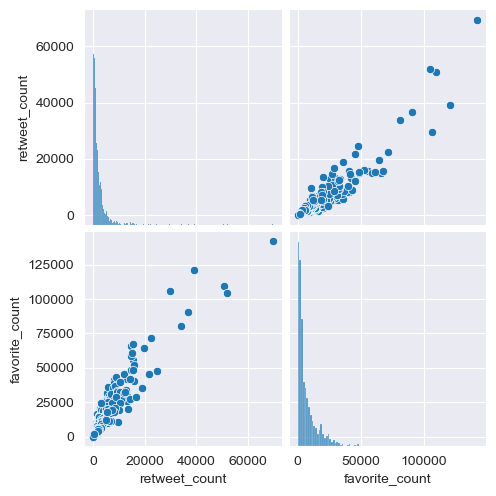

In [186]:
plt.figure(figsize=(3, 3));
sns.pairplot(df_master.loc[:, ['retweet_count', 'favorite_count']]);